# Do contact calculations as easily as on contact.engineering in your jupyter notebook

For more details on the simulations and more detailed use of the ContactMechanics Library, see notebooks
- [Hardwall_Simulation.ipynb](Hardwall_Simulation.ipynb)
- [plastic_simulation_cone.ipynb](plastic_simulation_cone.ipynb)
- [constrained_conjugate_gradients.ipynb](constrained_conjugate_gradients.ipynb)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from SurfaceTopography import read_published_container

## Read a published topography (Contact Mechanics challenge)

In [2]:
c, = read_published_container('https://contact.engineering/go/867nv')

In [5]:
[t.info["datafile"]['original'] for t in c ]

['0-50000x50000_randomtxt.txt',
 '1-5000x5000_randomtxt.txt',
 '2-500x500_randomtxt.txt']

In [8]:
t = c[2]

workaround to access the docstring

In [9]:
from ContactMechanics.PipelineFunction import contact_mechanics
print(contact_mechanics.__doc__)


    Carry out an automated contact mechanics calculations. The pipeline
    function return thermodynamic data (averages over the contact area,
    e.g. the total force or the total area). Spatially resolved data
    (pressure maps, displacement maps, etc.) are passed to the callback
    function. If this data is reqired, the callback function needs to take
    care of analyzing or storing it.

    Parameters
    ----------
    self : :obj:`SurfaceTopography.UniformTopographyInterface`
        Topography on which to carry out the contact calculation.
    substrate : str, optional
        Specifies whether substrate should be 'periodic' or 'nonperiodic'. If
        set to None, it will be chosen according to whether the topography is
        periodic or nonperiodic.
        (Default: None)
    nsteps : int, optional
        Number of contact steps. (Default: 10)
    offsets : list of floats, optional
        List with offsets. Can only be set if `nsteps` and `pressures` is
        set 

## Automatic contact calculations like on contact.engineering


In [10]:
mean_pressure, total_contact_area, mean_displacement, mean_gap, converged = t.contact_mechanics(nsteps=10)

Text(0, 0.5, 'relative contact area')

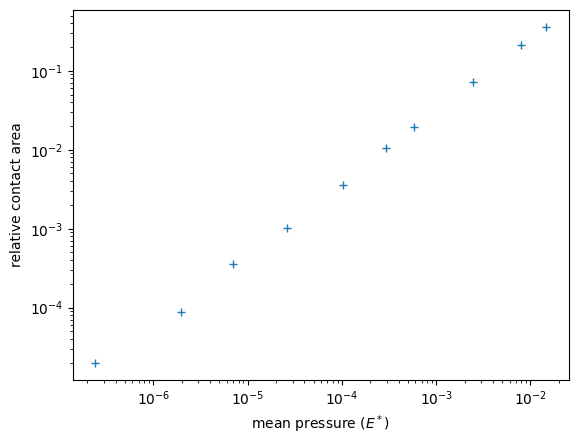

In [11]:
fig, ax = plt.subplots()
ax.loglog(mean_pressure, total_contact_area / np.prod(t.physical_sizes), "+")
ax.set_xlabel("mean pressure ($E^*$)")
ax.set_ylabel("relative contact area")
